In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [3]:
df['class']

0       0
1       1
2       1
3       0
4       0
       ..
6088    0
6089    1
6090    1
6091    0
6092    1
Name: class, Length: 6093, dtype: int64

In [4]:
X_train = df.drop(['class'], axis=1)
y_train = df['class']

In [5]:
clf_rf = RandomForestClassifier(random_state=0)

In [6]:
parametrs = {'n_estimators': [10,20,30, 40,50], 'max_depth': [1,3,5,7,9,11], 'min_samples_leaf': [1,2,3,4,5,6,7], 'min_samples_split': [2,4,6,8]}

In [7]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)

In [8]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [9]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [10]:
best_clf = grid_search_cv_clf.best_estimator_

In [11]:
feature_importances = best_clf.feature_importances_

In [12]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                      'feature_importances': feature_importances}) #важные переменные

In [13]:
feature_importances_df.sort_values('feature_importances', ascending=False) 

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [14]:
df_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
df_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [15]:
X_test = df_test

In [16]:
best_clf.predict(X_test).sum()

976

In [36]:
import requests, zipfile, io 
import pandas as pd

url = "https://stepik.org/media/attachments/course/4852/testing_y_mush.csv.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
txtfiles = z.namelist()
password = 'Cool!Move_forward!'
y_true = pd.read_csv(z.open(txtfiles[0], "r", pwd=password.encode('cp850', 'replace')))

In [37]:
y_true

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


In [38]:
y_pred = best_clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [40]:
from sklearn.metrics import confusion_matrix

omg = confusion_matrix(y_true, y_pred)

In [41]:
omg

array([[1055,    0],
       [   0,  976]], dtype=int64)

<AxesSubplot:>

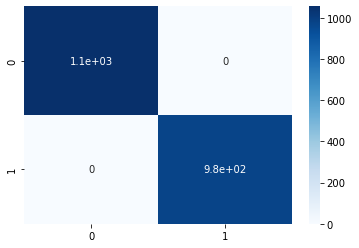

In [42]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")